<a href="https://colab.research.google.com/github/AlfonsoVasquezC/DataFiles/blob/main/TecMty_Regresion_lineal_polinomial_A00820656.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 7 Regresiones 

**Datos Generales**
**Nombre de la entrega:** Actividad Semanal -- 7 Regresiones 

**Nombre del Alumno:** Juan Alfonso Vasquez Chapoi 

**Matrícula:** A00820656

**Materia:** Ciencia y Analítica de Datos

**Profesor:** María de la Paz Rico Fernández

**Tutor:** Bernardo Charles Canales

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [86]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [87]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [88]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

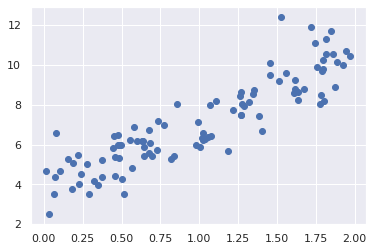

In [89]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [90]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [91]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [92]:
#X_fit[]

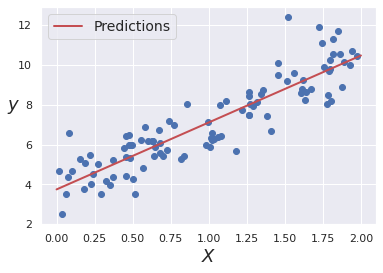

In [93]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [94]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [95]:
X_new.shape

(2, 1)

In [96]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [97]:
linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [98]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [99]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

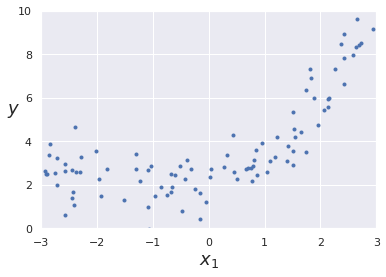

In [100]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [101]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [102]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [103]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [104]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [105]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [106]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

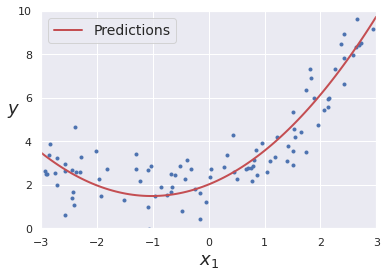

In [107]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [108]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [109]:
X = df[['Number of Units']]
y = df[['Manufacturing Cost']]

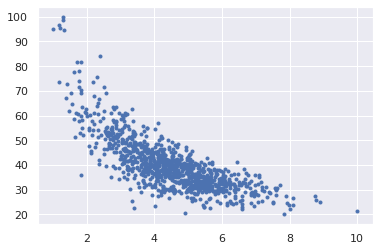

In [110]:
plt.plot(X,y,'b.')

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


In [112]:
y.describe()

,Manufacturing Cost
count,1000.000000
mean,40.052999
std,10.595322
min,20.000000
25%,32.912036
50%,38.345781
75%,44.531822
max,100.000000


## Líneal

In [113]:
#lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, np.ravel(y_train))

LinearRegression()

In [114]:
linear_reg.coef_

array([-5.98882699])

In [115]:
linear_reg.intercept_

66.83650741226988

**Ecuación:** 66.8365 - (5.9888 * x1)

In [116]:
y_pred = linear_reg.predict(X_test)

In [117]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), y_pred)))
print('r2_score',r2_score(np.ravel(y_test), y_pred))

Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
r2_score 0.6116251549562579


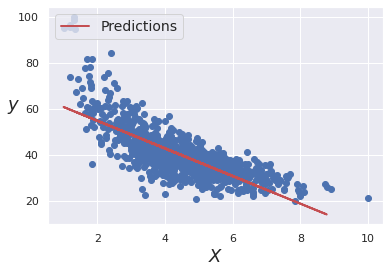

In [118]:
# construct best fit line
plt.scatter(X, y)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

## Polinomial

In [119]:
#polinomial
poly_transform = PolynomialFeatures(degree=2, include_bias = False)
polyX_train = poly_transform.fit_transform(X_train)

polyX_train


array([[ 7.97424764, 63.58862541],
       [ 1.89573077,  3.59379517],
       [ 3.5765014 , 12.79136229],
       ...,
       [ 3.94046305, 15.52724904],
       [ 4.52448429, 20.4709581 ],
       [ 5.86814353, 34.43510849]])

In [120]:
poly_regression = LinearRegression(fit_intercept=True)
poly_regression.fit(polyX_train, np.ravel(y_train))

LinearRegression()

In [121]:
poly_regression.coef_

array([-16.40638102,   1.13136095])

In [122]:
poly_regression.intercept_

88.80179909112496

Ecuación: 88.8018 - (16.4064 * x1) + (1.1314 * x1^2)

In [123]:
polyX_test = poly_transform.fit_transform(X_test)

polyX_test

array([[ 4.59166509, 21.08338832],
       [ 3.76967394, 14.21044161],
       [ 2.8664997 ,  8.21682054],
       [ 5.68471755, 32.31601367],
       [ 3.29465767, 10.85476918],
       [ 4.81805367, 23.21364117],
       [ 3.57595843, 12.78747866],
       [ 5.11140991, 26.12651126],
       [ 5.55378597, 30.84453858],
       [ 4.16852802, 17.37662587],
       [ 5.62832084, 31.67799542],
       [ 7.3112135 , 53.45384281],
       [ 5.30357877, 28.12794777],
       [ 3.9466642 , 15.57615828],
       [ 4.79741011, 23.01514375],
       [ 3.87397592, 15.00768943],
       [ 2.93564552,  8.61801461],
       [ 3.77662768, 14.26291663],
       [ 1.9430286 ,  3.77536014],
       [ 3.67314109, 13.49196544],
       [ 6.022948  , 36.27590259],
       [ 5.0459974 , 25.46208979],
       [ 5.62045553, 31.58952033],
       [ 5.33629896, 28.47608654],
       [ 5.26697681, 27.74104471],
       [ 3.41884077, 11.6884722 ],
       [ 4.65362079, 21.65618647],
       [ 2.34009136,  5.47602756],
       [ 4.17175172,

In [124]:
y_pred = poly_regression.predict(polyX_test)

In [125]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), y_pred)))
print('r2_score',r2_score(np.ravel(y_test), y_pred))

Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068423
r2_score 0.7385501224942537


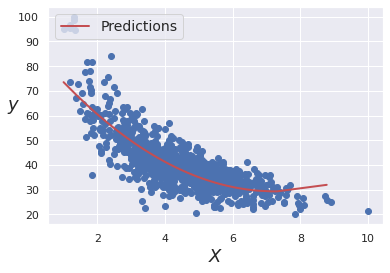

In [126]:
order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = y_pred[order]


plt.scatter(X, y)
plt.plot(sortedX, sorted_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);



## Ridge

In [127]:
from sklearn.linear_model import Ridge

In [128]:
ridge = Ridge()

In [129]:
ridge.fit(X_train, np.ravel(y_train))

Ridge()

In [130]:
y_pred = ridge.predict(X_test)

In [131]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), y_pred)))
print('r2_score',r2_score(np.ravel(y_test), y_pred))

Error medio Absoluto (MAE): 5.014112691100099
Root Mean Squared Error: 7.10938640108989
r2_score 0.611578926493084


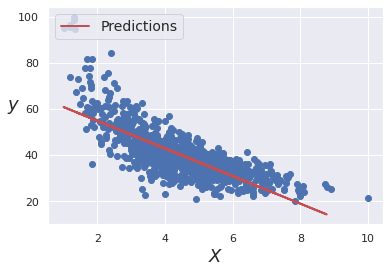

In [132]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [133]:
for alpha in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
  ridgealpha = Ridge(alpha = alpha).fit(X_train, np.ravel(y_train))
  y_pred_ridge = ridgealpha.predict(X_test)

  print(f"For Alpha: {alpha}\n")
  print(' Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), y_pred_ridge))
  print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), y_pred_ridge)))
  print(' r2_score',r2_score(np.ravel(y_test), y_pred_ridge),'\n')

For Alpha: 0.001

 Error medio Absoluto (MAE): 5.013588307194247
 Root Mean Squared Error: 7.108963743255114
 r2_score 0.6116251089118365 

For Alpha: 0.01

 Error medio Absoluto (MAE): 5.01359303431806
 Root Mean Squared Error: 7.108967536072839
 r2_score 0.6116246944954413 

For Alpha: 0.1

 Error medio Absoluto (MAE): 5.013640302610031
 Root Mean Squared Error: 7.109005479179772
 r2_score 0.6116205486880515 

For Alpha: 1.0

 Error medio Absoluto (MAE): 5.014112691100099
 Root Mean Squared Error: 7.10938640108989
 r2_score 0.611578926493084 

For Alpha: 10.0

 Error medio Absoluto (MAE): 5.018807317059395
 Root Mean Squared Error: 7.113342596109345
 r2_score 0.6111465130642051 

For Alpha: 100.0

 Error medio Absoluto (MAE): 5.063000806731028
 Root Mean Squared Error: 7.165672754549874
 r2_score 0.605404173687225 

For Alpha: 1000.0

 Error medio Absoluto (MAE): 5.482325022127586
 Root Mean Squared Error: 8.042029075689385
 r2_score 0.5029846248421004 



For Alpha: 0.001 

 Error medio Absoluto (MAE): 5.013588307194247
 Root Mean Squared Error: 7.108963743255114
 r2_score 0.6116251089118365 



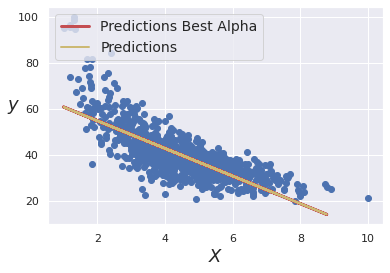

In [134]:
# Best Model

ridgealpha = Ridge(alpha = 0.001).fit(X_train, np.ravel(y_train))
y_pred_ridge = ridgealpha.predict(X_test)

plt.scatter(X, y)
plt.plot(X_test, y_pred_ridge, "r-", linewidth=3, label="Predictions Best Alpha")
plt.plot(X_test, y_pred, "y-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

print(f"For Alpha: 0.001 \n")
print(' Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), y_pred_ridge))
print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), y_pred_ridge)))
print(' r2_score',r2_score(np.ravel(y_test), y_pred_ridge),'\n')


In [135]:
print(f"{ridgealpha.coef_} \n")
print(f"{ridgealpha.intercept_}")

[-5.98882322] 

66.83649054434176


**Ecuation Ridge Best Alpha:** 66.8365 - (5.9888 * x1)

## Lasso

In [136]:
from sklearn.linear_model import Lasso

Error medio Absoluto (MAE): 5.014112691100099
Root Mean Squared Error: 7.10938640108989
r2_score 0.611578926493084


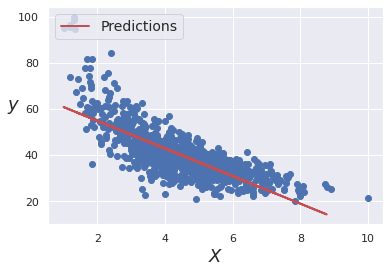

In [137]:
lasso = Lasso()
lasso.fit(X_train, np.ravel(y_train))
y_ped = lasso.predict(X_test)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), y_pred)))
print('r2_score',r2_score(np.ravel(y_test), y_pred))

plt.scatter(X, y)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [138]:
for alpha in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
  lassoalpha = Lasso(alpha = alpha).fit(X_train, np.ravel(y_train))
  y_pred_lasso = lassoalpha.predict(X_test)

  print(f"For Alpha: {alpha}\n")
  print(' Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), y_pred_lasso))
  print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), y_pred_lasso)))
  print(' r2_score',r2_score(np.ravel(y_test), y_pred_lasso),'\n')

For Alpha: 0.001

 Error medio Absoluto (MAE): 5.013666714883823
 Root Mean Squared Error: 7.109026694479482
 r2_score 0.6116182306145095 

For Alpha: 0.01

 Error medio Absoluto (MAE): 5.014377111243569
 Root Mean Squared Error: 7.109600993354153
 r2_score 0.6115554776577234 

For Alpha: 0.1

 Error medio Absoluto (MAE): 5.021481074841028
 Root Mean Squared Error: 7.115734194801758
 r2_score 0.6108849938658001 

For Alpha: 1.0

 Error medio Absoluto (MAE): 5.092520710815617
 Root Mean Squared Error: 7.2156139275269515
 r2_score 0.5998847335404536 

For Alpha: 10.0

 Error medio Absoluto (MAE): 7.865874818596601
 Root Mean Squared Error: 11.057733591834
 r2_score 0.06033988967556758 

For Alpha: 100.0

 Error medio Absoluto (MAE): 8.173133499816442
 Root Mean Squared Error: 11.407593526938278
 r2_score -6.130156795136621e-05 

For Alpha: 1000.0

 Error medio Absoluto (MAE): 8.173133499816442
 Root Mean Squared Error: 11.407593526938278
 r2_score -6.130156795136621e-05 



For Alpha: 0.001 

 Error medio Absoluto (MAE): 5.013666714883823
 Root Mean Squared Error: 7.109026694479482
 r2_score 0.6116182306145095 



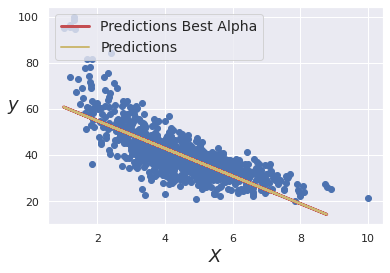

In [139]:
# Best Model

lassoalpha = Lasso(alpha = 0.001).fit(X_train, np.ravel(y_train))
y_pred_lasso = lassoalpha.predict(X_test)

plt.scatter(X, y)
plt.plot(X_test, y_pred_lasso, "r-", linewidth=3, label="Predictions Best Alpha")
plt.plot(X_test, y_pred, "y-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

print(f"For Alpha: 0.001 \n")
print(' Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), y_pred_lasso))
print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), y_pred_lasso)))
print(' r2_score',r2_score(np.ravel(y_test), y_pred_lasso),'\n')

In [140]:
print(f"{lassoalpha.coef_} \n")
print(f"{lassoalpha.intercept_}")

[-5.98826037] 

66.8339725010262


**Ecuation Lasso Best Alpha:** 66.8340 - (5.9883 * x1)

In [141]:
polyX_test


array([[ 4.59166509, 21.08338832],
       [ 3.76967394, 14.21044161],
       [ 2.8664997 ,  8.21682054],
       [ 5.68471755, 32.31601367],
       [ 3.29465767, 10.85476918],
       [ 4.81805367, 23.21364117],
       [ 3.57595843, 12.78747866],
       [ 5.11140991, 26.12651126],
       [ 5.55378597, 30.84453858],
       [ 4.16852802, 17.37662587],
       [ 5.62832084, 31.67799542],
       [ 7.3112135 , 53.45384281],
       [ 5.30357877, 28.12794777],
       [ 3.9466642 , 15.57615828],
       [ 4.79741011, 23.01514375],
       [ 3.87397592, 15.00768943],
       [ 2.93564552,  8.61801461],
       [ 3.77662768, 14.26291663],
       [ 1.9430286 ,  3.77536014],
       [ 3.67314109, 13.49196544],
       [ 6.022948  , 36.27590259],
       [ 5.0459974 , 25.46208979],
       [ 5.62045553, 31.58952033],
       [ 5.33629896, 28.47608654],
       [ 5.26697681, 27.74104471],
       [ 3.41884077, 11.6884722 ],
       [ 4.65362079, 21.65618647],
       [ 2.34009136,  5.47602756],
       [ 4.17175172,

In [142]:
def get_models():
  modelos = [LinearRegression(), LinearRegression(), Ridge(), Lasso()]
  nombres = ['LR', 'Poly LR', 'Ridge', 'Lasso']
  
  resultados = list()

  MAE_train = list()
  R2_train = list()

  MAE_test = list()
  R2_test = list()

  conjuntos_train = [X_train, np.ravel(y_train)]
  conjuntos_test = [X_test, np.ravel(y_test)]

  conjuntos_ply_train = [polyX_train, np.ravel(y_train)]
  conjuntos_ply_test = [polyX_test, np.ravel(y_test)]

  for i,m in list(enumerate(modelos)):
    print(i,m)
    modelo = modelos[i]
    if i != 1:

      modelo = modelo.fit(conjuntos_train[0], conjuntos_train[1])
      pred = modelo.predict(conjuntos_train[0])
      
      MAE_train.append(metrics.mean_absolute_error(conjuntos_train[1], pred))
      R2_train.append(r2_score(conjuntos_train[1], pred))

      modelo = modelos[i]

      ##########################################################################
      modelo = modelo.fit(conjuntos_train[0], conjuntos_train[1])
      pred = modelo.predict(conjuntos_test[0])
      resultados.append(pred)
      MAE_test.append(metrics.mean_absolute_error(conjuntos_test[1], pred))
      R2_test.append(r2_score(conjuntos_test[1], pred))

    else:

      modelo = modelo.fit(conjuntos_ply_train[0], conjuntos_ply_train[1])
      pred = modelo.predict(conjuntos_ply_train[0])
      
      MAE_train.append(metrics.mean_absolute_error(conjuntos_ply_train[1], pred))
      R2_train.append(r2_score(conjuntos_ply_train[1], pred))

      modelo = modelos[i]

      ##########################################################################

      modelo = modelo.fit(conjuntos_ply_train[0], conjuntos_ply_train[1])
      pred = modelo.predict(conjuntos_ply_test[0])
      resultados.append(pred)
      MAE_test.append(metrics.mean_absolute_error(conjuntos_ply_test[1], pred))
      R2_test.append(r2_score(conjuntos_ply_test[1], pred))


  return modelos, nombres, resultados, MAE_train, R2_train, MAE_test, R2_test

In [143]:
modelos, nombres, resultados, MAE_train, R2_train, MAE_test, R2_test  = get_models()

0 LinearRegression()
1 LinearRegression()
2 Ridge()
3 Lasso()


In [144]:
minMAEindex = np.argsort(np.array(MAE_test))
minMAEindex

array([1, 0, 2, 3])

In [145]:
minMAEindex[0]

1

In [146]:
minR2index = np.argsort(np.array(R2_test))
minR2index

array([3, 2, 0, 1])

In [147]:
minR2index[len(minR2index)-1]

1

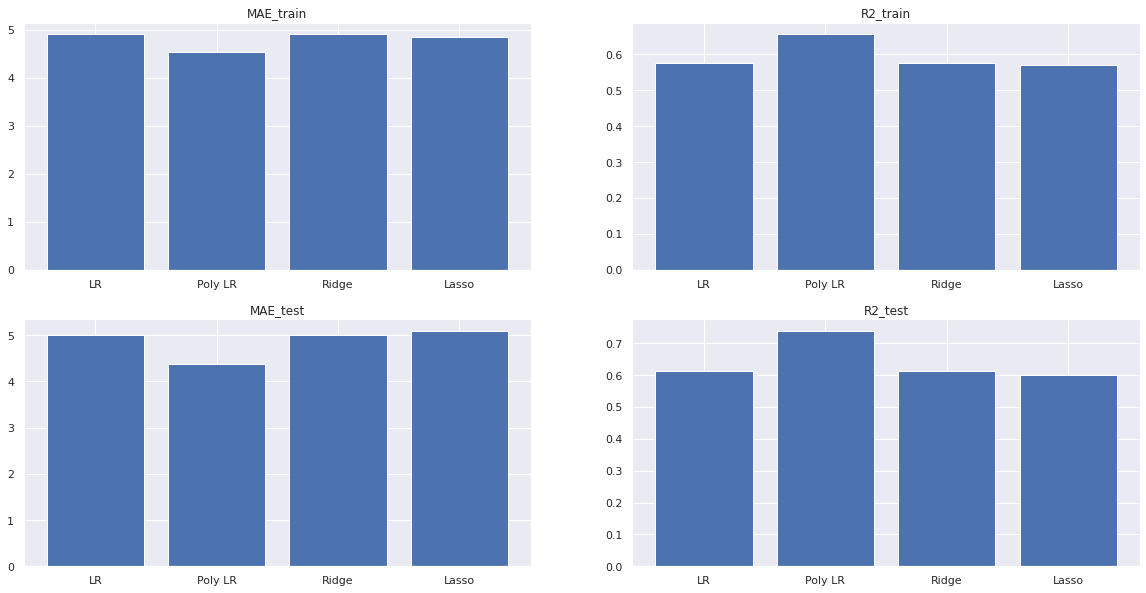

In [148]:
from matplotlib.axes import Subplot

sns.set_theme(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(2, 2)

minMAEindex = np.argsort(np.array(MAE_test))
bestMAE = minMAEindex[0]

minR2index = np.argsort(np.array(R2_test))
bestR2 = minR2index[len(minR2index)-1]

names = ['LR', 'Poly LR', 'Ridge', 'Lasso']


plt.subplot(2,2,1)
plt.bar(names, height = MAE_train)
plt.title(label="MAE_train")

plt.subplot(2,2,2)
plt.bar(names, height = R2_train)
plt.title(label="R2_train")

plt.subplot(2,2,3)
plt.bar(names, height = MAE_test)
plt.plot(MAE_test[bestMAE])
plt.title(label="MAE_test")

plt.subplot(2,2,4)
plt.bar(names, height = R2_test)
plt.plot(R2_test[bestR2])
plt.title(label="R2_test")


plt.show()

En conclusión vemos como de los 4 modelos el que minimiza el MAE y maximiza el R^2 es el modelo Polinomial.

En cuanto al resto de los modelos no se ve un impacto positivo en el desempeño de usar Ridge o Lasso, para este caso en particular.

Los resultados fueron los siguientes:

In [149]:
for i in range(len(modelos)):
  print(f"Modelo {modelos[i]}")
  print(f"MAE_train {MAE_train[i]:.4}")
  print(f"MAE_test {MAE_test[i]:.4}")
  print(f"R2_train {R2_train[i]:.4}")
  print(f"R2_test {R2_test[i]:.4}\n")

Modelo LinearRegression()
MAE_train 4.905
MAE_test 5.014
R2_train 0.5747
R2_test 0.6116

Modelo LinearRegression()
MAE_train 4.545
MAE_test 4.383
R2_train 0.6552
R2_test 0.7386

Modelo Ridge()
MAE_train 4.905
MAE_test 5.014
R2_train 0.5747
R2_test 0.6116

Modelo Lasso()
MAE_train 4.856
MAE_test 5.093
R2_train 0.5695
R2_test 0.5999



#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [150]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5826,1773101159,20150107T000000,250000.0,3,2.25,1050,572,2.0,0,0,...,7,740,310,2006,0,98106,47.5549,-122.363,1260,1062
11884,5631501323,20140805T000000,309500.0,3,1.50,1340,13560,1.0,0,0,...,7,1340,0,1968,0,98028,47.7410,-122.234,1540,15000
14364,546000910,20141203T000000,620000.0,3,1.75,2040,4005,1.5,0,0,...,8,1740,300,1930,0,98117,47.6885,-122.380,1380,4005
5814,1922069071,20150424T000000,411000.0,4,1.75,2250,292288,1.0,0,0,...,7,2250,0,1963,0,98042,47.3787,-122.091,1550,23798
971,2009001600,20150506T000000,265000.0,3,1.00,1070,9000,1.0,0,0,...,7,1070,0,1950,0,98198,47.4061,-122.330,1840,12000
5331,3629930170,20140514T000000,723000.0,4,2.50,2700,4004,2.0,0,0,...,9,2700,0,2004,0,98029,47.5521,-121.995,2260,4459
15703,1442740010,20141107T000000,465000.0,4,2.50,2590,16437,2.0,0,0,...,8,2590,0,1986,0,98038,47.3714,-122.059,2320,15625
8739,4010800110,20140609T000000,305100.0,3,2.00,1590,35988,1.0,0,0,...,8,1590,0,1974,0,98058,47.4365,-122.106,2780,23789
19681,1266200140,20150506T000000,1850000.0,4,3.25,4160,10335,2.0,0,0,...,10,4160,0,2014,0,98004,47.6235,-122.192,1840,10333
15094,4037000635,20150327T000000,485000.0,4,2.25,1850,9911,1.0,0,0,...,7,1850,0,1957,0,98008,47.6019,-122.116,1650,8670


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [152]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [153]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


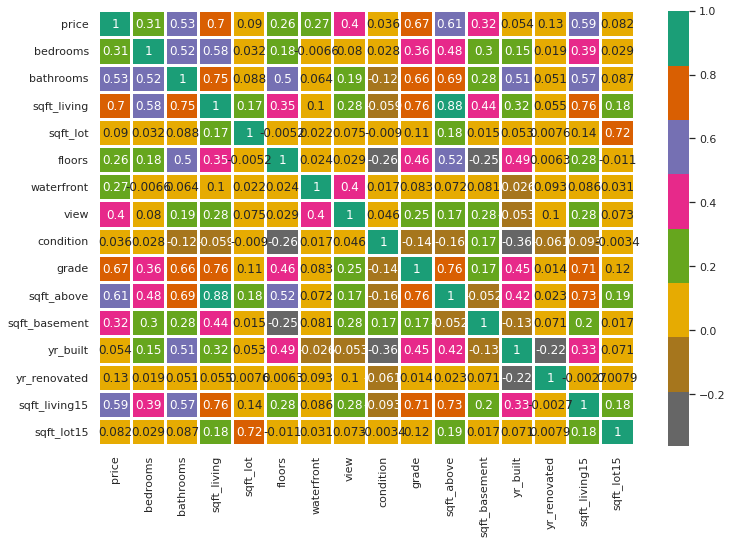

In [154]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [155]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
Tamaño de y_train: (19451, 1)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)
Tamaño de y_test: (2162, 1)


### Regresión Líneal Multiple

In [157]:
rlm = LinearRegression()
rlm = rlm.fit(X_train, y_train)
rlm_yhat = rlm.predict(X_test)


In [158]:
rlm.coef_[0]

array([-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,  1.71356997e-02,
        3.16916913e+04,  5.52691023e+05,  4.12493228e+04,  2.12221443e+04,
        1.19493216e+05,  4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
        1.32602215e+01,  2.90059284e+01, -5.48132603e-01])

In [159]:
rlm.intercept_

array([6151359.2627409])

In [160]:
coeficientes = []

for i,c in enumerate(rlm.coef_[0]):
  coeficientes.append([f"X{i+1} * {c}"])

coeficientes = [rlm.intercept_[0]] + coeficientes

coeficientes

[6151359.262740902,
 ['X1 * -38200.80483396449'],
 ['X2 * 41466.13802863147'],
 ['X3 * 107.99258400093822'],
 ['X4 * 0.0171356997161638'],
 ['X5 * 31691.691313553605'],
 ['X6 * 552691.0233181857'],
 ['X7 * 41249.32275203692'],
 ['X8 * 21222.144256109055'],
 ['X9 * 119493.21585367358'],
 ['X10 * 47.77502707057647'],
 ['X11 * 60.21755653483342'],
 ['X12 * -3550.9021573131968'],
 ['X13 * 13.260221498272529'],
 ['X14 * 29.00592838751345'],
 ['X15 * -0.5481326027838804']]

In [161]:
print(' Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), rlm_yhat))
print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), rlm_yhat)))
print(' r2_score',r2_score(np.ravel(y_test), rlm_yhat),'\n')

 Error medio Absoluto (MAE): 137480.1388273178
 Root Mean Squared Error: 232133.3676240749
 r2_score 0.6579723205007814 



### Regresión Polinomial multiple

In [162]:
polyfeat = PolynomialFeatures(degree = 2, include_bias = False)
X_train_transf = polyfeat.fit_transform(X_train)
X_test_transf = polyfeat.fit_transform(X_test)

print(f'Tamaño de X_train: {X_train_transf.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print("*****"*10)

print(f'Tamaño del X_test: {X_test_transf.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

Tamaño de X_train: (19451, 135)
Tamaño de y_train: (19451, 1)
**************************************************
Tamaño del X_test: (2162, 135)
Tamaño de y_test: (2162, 1)


In [163]:
rlm_transf = LinearRegression()
rlm_transf = rlm_transf.fit(X_train_transf, y_train)
rlm_transf_yhat = rlm_transf.predict(X_test_transf)


In [164]:
coeficientes = []

for i,c in enumerate(rlm_transf.coef_[0]):
  coeficientes.append([f"X{i+1} * {c}"])

coeficientes = [rlm_transf.intercept_[0]] + coeficientes

coeficientes

[80227028.3104757,
 ['X1 * 933912.8339811402'],
 ['X2 * -1093307.2988890775'],
 ['X3 * -456.44993232234583'],
 ['X4 * -27.868628841106222'],
 ['X5 * -2074072.3849893238'],
 ['X6 * -3954318.699668158'],
 ['X7 * -288638.0258699706'],
 ['X8 * 558697.5702310547'],
 ['X9 * 1098645.1037843083'],
 ['X10 * -219.75841511336466'],
 ['X11 * -382.0342717188405'],
 ['X12 * -85963.09077123865'],
 ['X13 * -2953.515948116647'],
 ['X14 * 3999.657097775203'],
 ['X15 * -34.01063159901658'],
 ['X16 * 957.5416964104098'],
 ['X17 * 7499.581904143857'],
 ['X18 * -13.796946593364062'],
 ['X19 * -0.018492669492754743'],
 ['X20 * 8576.995692417637'],
 ['X21 * -11496.58932158693'],
 ['X22 * -306.5888999158299'],
 ['X23 * -5246.2883559460415'],
 ['X24 * -5367.880649994306'],
 ['X25 * -1.2075766861609267'],
 ['X26 * -14.606818153087893'],
 ['X27 * -467.0994514251412'],
 ['X28 * -9.131915185241255'],
 ['X29 * 17.280064173510084'],
 ['X30 * 0.21550019812278265'],
 ['X31 * -9634.29892181688'],
 ['X32 * 15.38791716109

In [165]:
print(' Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), rlm_transf_yhat))
print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), rlm_transf_yhat)))
print(' r2_score',r2_score(np.ravel(y_test), rlm_transf_yhat),'\n')

 Error medio Absoluto (MAE): 121314.06948173394
 Root Mean Squared Error: 186261.28575138954
 r2_score 0.7797929072570198 



#### Ridge

In [166]:
for alpha in [0.0001,0.001,0.01,0.10,1,10,100,1000,10000]:
  rlmRidge = Ridge(alpha = alpha)
  rlmRidge = rlmRidge.fit(X_train, y_train)
  rlmRidge_yhat = rlmRidge.predict(X_test)

  print(f'Alpha: {alpha}')
  print(' Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), rlmRidge_yhat))
  print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), rlmRidge_yhat)))
  print(' r2_score',r2_score(np.ravel(y_test), rlmRidge_yhat),'\n')

Alpha: 0.0001
 Error medio Absoluto (MAE): 137480.1399265206
 Root Mean Squared Error: 232133.37081515093
 r2_score 0.6579723110972531 

Alpha: 0.001
 Error medio Absoluto (MAE): 137480.14981918843
 Root Mean Squared Error: 232133.3995348581
 r2_score 0.6579722264654257 

Alpha: 0.01
 Error medio Absoluto (MAE): 137480.24873801804
 Root Mean Squared Error: 232133.68672887486
 r2_score 0.6579713801555791 

Alpha: 0.1
 Error medio Absoluto (MAE): 137481.23714210742
 Root Mean Squared Error: 232136.5583622373
 r2_score 0.6579629179036365 

Alpha: 1
 Error medio Absoluto (MAE): 137491.0433940327
 Root Mean Squared Error: 232165.2426647754
 r2_score 0.6578783840295006 

Alpha: 10
 Error medio Absoluto (MAE): 137585.19973837206
 Root Mean Squared Error: 232447.74672687982
 r2_score 0.6570452743997186 

Alpha: 100
 Error medio Absoluto (MAE): 138203.47631588625
 Root Mean Squared Error: 234583.47523048488
 r2_score 0.6507141904983357 

Alpha: 1000
 Error medio Absoluto (MAE): 139229.336453963

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.02626e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.02113e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [167]:
rlmRidge = Ridge(alpha = 0.01)
rlmRidge = rlmRidge.fit(X_train, y_train)
rlmRidge_yhat = rlmRidge.predict(X_test)

coeficientes = []

for i,c in enumerate(rlmRidge.coef_[0]):
  coeficientes.append([f"X{i+1} * {c}"])

coeficientes = [rlmRidge.intercept_[0]] + coeficientes

coeficientes


[6151353.1502188835,
 ['X1 * -38200.99074908595'],
 ['X2 * 41465.98570972302'],
 ['X3 * 107.9978100060307'],
 ['X4 * 0.017133644308285508'],
 ['X5 * 31691.66608554911'],
 ['X6 * 552646.3396570698'],
 ['X7 * 41251.40580231897'],
 ['X8 * 21222.187766210078'],
 ['X9 * 119492.98845883168'],
 ['X10 * 47.77033463168526'],
 ['X11 * 60.21243429504852'],
 ['X12 * -3550.898127166975'],
 ['X13 * 13.260795530474683'],
 ['X14 * 29.00571895053975'],
 ['X15 * -0.5481312486011064']]

In [168]:
print(' Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), rlmRidge_yhat))
print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), rlmRidge_yhat)))
print(' r2_score',r2_score(np.ravel(y_test), rlmRidge_yhat),'\n')

 Error medio Absoluto (MAE): 137480.24873801804
 Root Mean Squared Error: 232133.68672887486
 r2_score 0.6579713801555791 



#### Lasso

In [169]:
X_trainLasso = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']]
X_testLasso = X_test[['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']]

for alpha in [0.0001,0.001,0.01,0.10,1,10,100,1000,10000]:
  rlmLasso = Lasso(alpha = alpha, max_iter=100000)
  rlmLasso = rlmLasso.fit(X_trainLasso, y_train)
  rlmLasso_yhat = rlmLasso.predict(X_testLasso)

  print(f'Alpha: {alpha}')
  print(' Error medio Absoluto (MAE):', metrics.mean_absolute_error(np.ravel(y_test), rlmLasso_yhat))
  print(' Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.ravel(y_test), rlmLasso_yhat)))
  print(' r2_score',r2_score(np.ravel(y_test), rlmLasso_yhat),'\n')

Alpha: 0.0001
 Error medio Absoluto (MAE): 152589.95211995096
 Root Mean Squared Error: 254217.396078589
 r2_score 0.5897990686320324 

Alpha: 0.001
 Error medio Absoluto (MAE): 152589.95216071987
 Root Mean Squared Error: 254217.39611977793
 r2_score 0.5897990684991088 

Alpha: 0.01
 Error medio Absoluto (MAE): 152589.95256840522
 Root Mean Squared Error: 254217.39653166736
 r2_score 0.5897990671698731 

Alpha: 0.1
 Error medio Absoluto (MAE): 152589.95664522774
 Root Mean Squared Error: 254217.40065070335
 r2_score 0.5897990538770579 

Alpha: 1
 Error medio Absoluto (MAE): 152589.99741411774
 Root Mean Squared Error: 254217.44185686467
 r2_score 0.5897989208979016 

Alpha: 10
 Error medio Absoluto (MAE): 152590.40509938722
 Root Mean Squared Error: 254217.85546875495
 r2_score 0.5897975861021417 

Alpha: 100
 Error medio Absoluto (MAE): 152594.55673450584
 Root Mean Squared Error: 254222.14685619203
 r2_score 0.589783736938476 

Alpha: 1000
 Error medio Absoluto (MAE): 152661.9070020

In [173]:
rlmLasso.coef_

array([-3.10836678e+04, -2.28560291e+04,  3.04580643e+02,  8.56315716e+04,
        9.80577798e+04, -1.25036536e+02, -7.54159935e+01,  7.59548291e+00])

In [178]:
rlmLasso = Lasso(alpha = 0.001, max_iter = 100000)
rlmLasso = rlmLasso.fit(X_trainLasso, y_train)
rlmLasso_yhat = rlmLasso.predict(X_testLasso)

coeficientes = []

for i,c in enumerate(rlmLasso.coef_):
  coeficientes.append([f"X{i+1} * {c}"])

coeficientes = [rlmLasso.intercept_[0]] + coeficientes

coeficientes

[-481130.364434551,
 ['X1 * -31083.667105900036'],
 ['X2 * -22856.025142193284'],
 ['X3 * 304.58063855442856'],
 ['X4 * 85631.57015197758'],
 ['X5 * 98057.77756725923'],
 ['X6 * -125.0365336254479'],
 ['X7 * -75.41599080264933'],
 ['X8 * 7.595484497284491']]

In [199]:
def get_models_rlm():
  modelos = [LinearRegression(), LinearRegression(), Ridge(alpha = 0.01), Lasso(0.001)]
  nombres = ['LR', 'Poly LR', 'Ridge', 'Lasso']
  
  resultados = list()

  residuos_train = list()
  
  residuos_test = list()
 

  conjuntos_train = [X_train, np.ravel(y_train)]
  conjuntos_test = [X_test, np.ravel(y_test)]

  conjuntos_ply_train = [X_train_transf, np.ravel(y_train)]
  conjuntos_ply_test = [X_test_transf, np.ravel(y_test)]

  R2_train = list()
  R2_test = list()

  for i,m in list(enumerate(modelos)):
    print(i,m)
    modelo = modelos[i]
    if i == 0 or i == 2:

      modelo = modelo.fit(conjuntos_train[0], conjuntos_train[1])
      pred = modelo.predict(conjuntos_train[0])
      residuos_train.append(np.subtract(conjuntos_train[1], pred))
      R2_train.append(r2_score(conjuntos_train[1], pred))
      

      modelo = modelos[i]

      ##########################################################################
      modelo = modelo.fit(conjuntos_train[0], conjuntos_train[1])
      pred = modelo.predict(conjuntos_test[0])
      resultados.append(pred)
      residuos_test.append(np.subtract(conjuntos_test[1], pred))
      R2_test.append(r2_score(conjuntos_test[1], pred))

    elif i == 3:

      modelo = modelo.fit(X_trainLasso, conjuntos_train[1])
      pred = modelo.predict(X_trainLasso)
      residuos_train.append(np.subtract(conjuntos_train[1], pred))
      R2_train.append(r2_score(conjuntos_train[1], pred))
      

      modelo = modelos[i]

      ##########################################################################
      modelo = modelo.fit(X_trainLasso, conjuntos_train[1])
      pred = modelo.predict(X_testLasso)
      resultados.append(pred)
      residuos_test.append(np.subtract(conjuntos_test[1], pred))
      R2_test.append(r2_score(conjuntos_test[1], pred))
      

    else:

      modelo = modelo.fit(conjuntos_ply_train[0], conjuntos_ply_train[1])
      pred = modelo.predict(conjuntos_ply_train[0])
      residuos_train.append(np.subtract(conjuntos_train[1], pred))
      R2_train.append(r2_score(conjuntos_train[1], pred))
      

      modelo = modelos[i]

      ##########################################################################

      modelo = modelo.fit(conjuntos_ply_train[0], conjuntos_ply_train[1])
      pred = modelo.predict(conjuntos_ply_test[0])
      resultados.append(pred)
      residuos_test.append(np.subtract(conjuntos_test[1], pred))
      R2_test.append(r2_score(conjuntos_test[1], pred))
      


  return modelos, nombres, resultados, residuos_train, residuos_test, R2_train, R2_test

In [200]:
modelos, nombres, resultados, residuos_train, residuos_test,R2_train, R2_test = get_models_rlm()

0 LinearRegression()
1 LinearRegression()
2 Ridge(alpha=0.01)
3 Lasso(alpha=0.001)


Text(0.5, 1.0, 'Residuos Test')

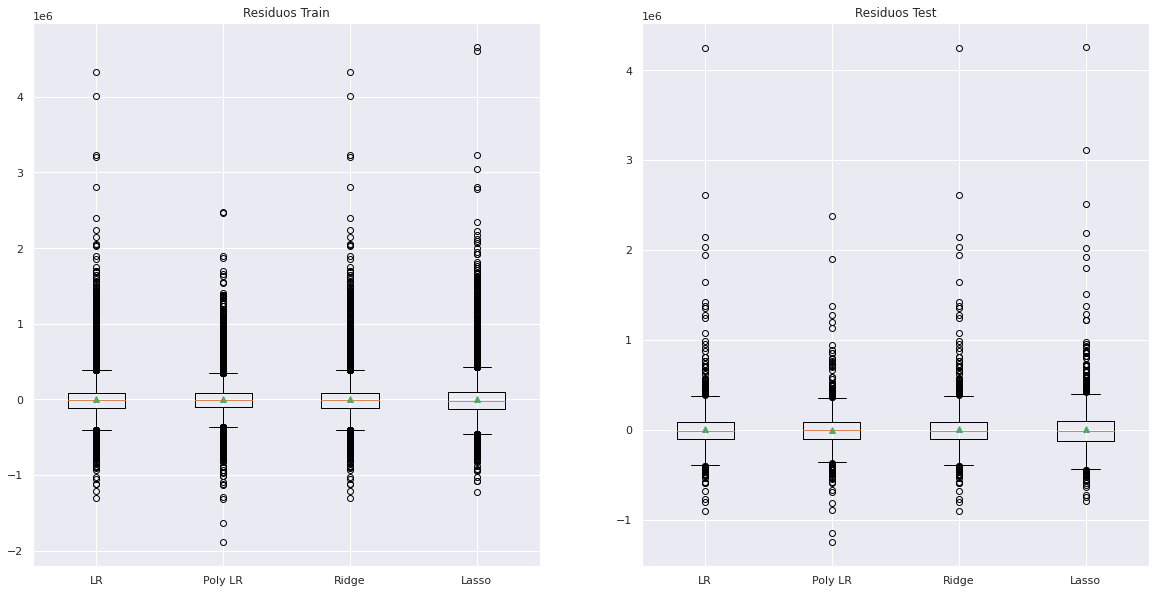

In [201]:
from matplotlib.axes import Subplot

sns.set_theme(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(1, 2)

names = ['LR', 'Poly LR', 'Ridge', 'Lasso']

plt.subplot(1,2,1)
plt.boxplot(residuos_train, labels=names, showmeans=True)
plt.title(label="Residuos Train")

plt.subplot(1,2,2)
plt.boxplot(residuos_test, labels=names, showmeans=True)
plt.title(label="Residuos Test")

#### Escalamos los residuos para tener una mejor visibilidad

In [202]:
from sklearn.preprocessing import StandardScaler

residuos_train_scaled = StandardScaler()
residuos_train_scaled = residuos_train_scaled.fit_transform(residuos_train)

In [203]:
residuos_test_scaled = StandardScaler()
residuos_test_scaled = residuos_test_scaled.fit_transform(residuos_test)

In [204]:
residuos_test_scaled

array([[-0.63378149, -0.97781577,  0.9380017 , ..., -0.99224359,
         0.92612963, -0.38564682],
       [-0.46013213,  0.68135874, -0.4477841 , ...,  0.81643415,
        -0.39268962,  1.69046356],
       [-0.63377938, -0.97775621,  0.93799845, ..., -0.9922419 ,
         0.92613364, -0.38563492],
       [ 1.72769301,  1.27421324, -1.42821606, ...,  1.16805135,
        -1.45957365, -0.91918181]])

Text(0.5, 1.0, 'Residuos Test')

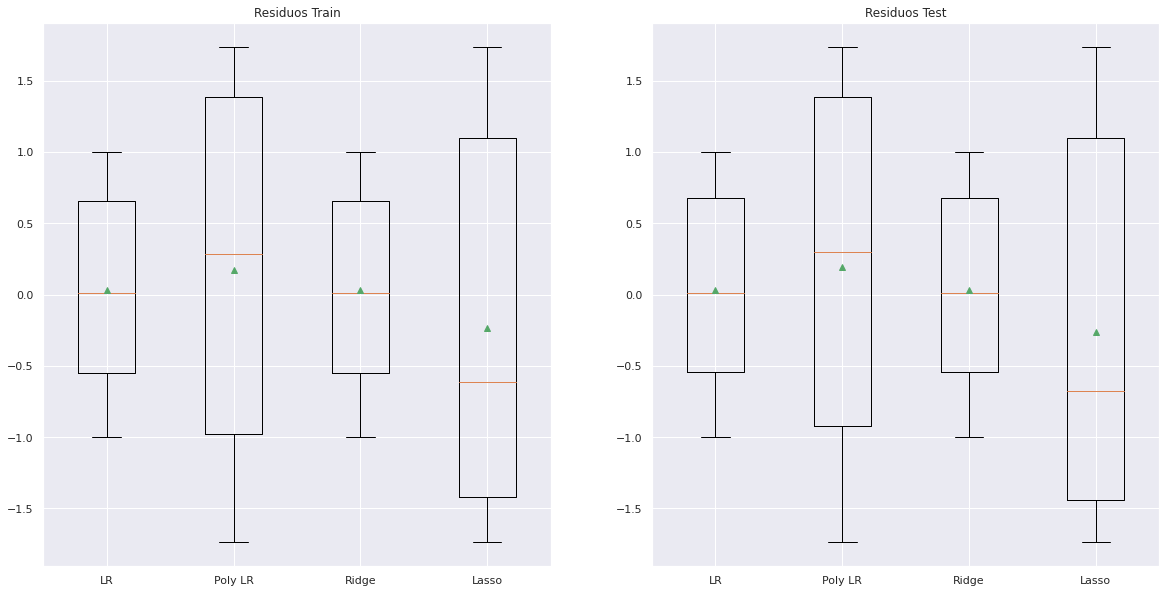

In [205]:
sns.set_theme(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(1, 2)

names = ['LR', 'Poly LR', 'Ridge', 'Lasso']

plt.subplot(1,2,1)
plt.boxplot(list(residuos_train_scaled), labels=names, showmeans=True)
plt.title(label="Residuos Train")

plt.subplot(1,2,2)
plt.boxplot(list(residuos_test_scaled), labels=names, showmeans=True)
plt.title(label="Residuos Test")

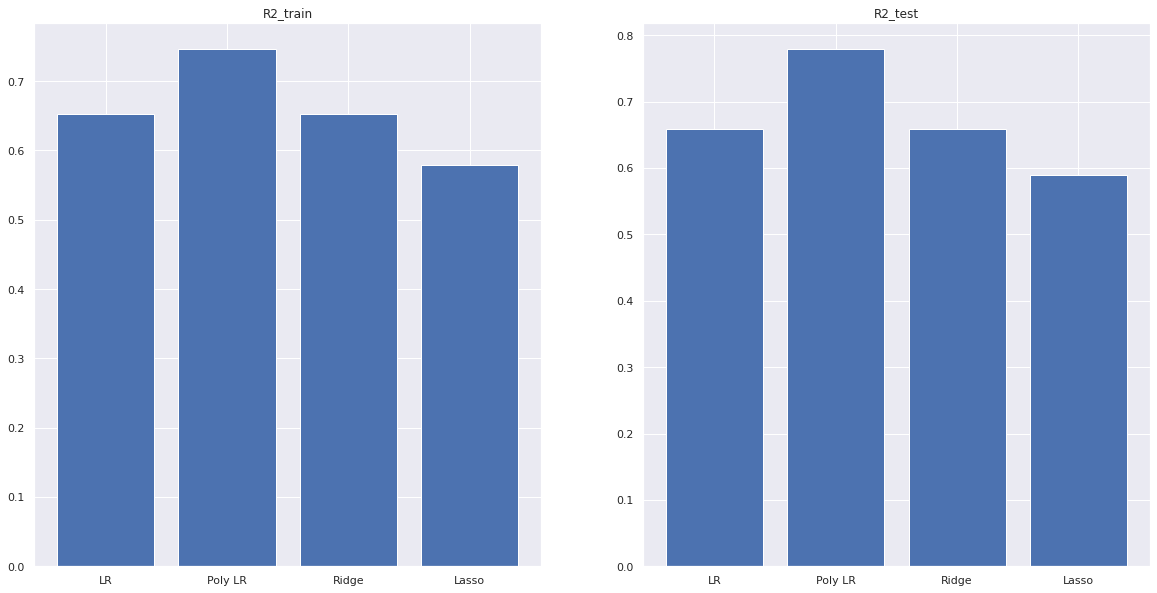

In [206]:
sns.set_theme(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(1, 2)

names = ['LR', 'Poly LR', 'Ridge', 'Lasso']


plt.subplot(1,2,1)
plt.bar(names, height = R2_train)
plt.title(label="R2_train")

plt.subplot(1,2,2)
plt.bar(names, height = R2_test)
plt.plot(R2_test[bestR2])
plt.title(label="R2_test")


plt.show()

En conclusion podemos detemrinar que tanto el modelo de regresión polinomial de grado dos es el que presenta un mejor valor de R^2.

En cuanto a los residuos este modelo es el que tiene la mayor desviación de los cuatro. 

El modelo Ridge y el de regresión líneal tienen un buen desempeño en lo que respecta a los residuos, pues estan muy centrados, y en lo que respecta R^2 estan un 10% mas abajo que el modelo polinomial.

El modelo con Lasso es el peor de todos.

Los resultados fueron los siguientes:

In [208]:
for i in range(len(modelos)):
  print(f"Modelo {nombres[i]}")
  print(f"residuos_train {np.mean(residuos_train_scaled[i]):.4}")
  print(f"residuos_test {np.mean(residuos_test_scaled[i]):.4}")
  print(f"R2_train {R2_train[i]:.4}")
  print(f"R2_test {R2_test[i]:.4}\n")

Modelo LR
residuos_train 0.0309
residuos_test 0.03349
R2_train 0.6529
R2_test 0.658

Modelo Poly LR
residuos_train 0.1729
residuos_test 0.1931
R2_train 0.747
R2_test 0.7798

Modelo Ridge
residuos_train 0.0309
residuos_test 0.03349
R2_train 0.6529
R2_test 0.658

Modelo Lasso
residuos_train -0.2347
residuos_test -0.2601
R2_train 0.5786
R2_test 0.5898



## Fin de la Actividad, Saludos!